### 👥 Integrantes: 

- [Alan Gonçalves](https://github.com/alansgoncalves)
- [Élen Silva Almeida](https://github.com/Lely0sa)
- [Gabriel Matina](https://github.com/gabrielmatina)
- [Gustavo Dell Anhol Oliveira](https://github.com/gudaoliveira)
- [Patrick Kwan](https://github.com/ptkwan)

Tópicos das aulas

- Estatística descritiva
- Probabilidade e distribuições
- Inferência
- Amostragem
- Testes estatísticos de hipótese

_A proposta do projeto final é desenvolver uma análise exploratória de dados
(EDA) com enfoque na avaliação de relações entre as variáveis medidas e uma variável
dependente, a qual constitui aquilo que geralmente se costuma objetivar prever em uma base de dados._

[Entregar neste link](https://docs.google.com/spreadsheets/d/1qBwKAnW83AZUQlgzldMMi50QqsZBuBC7CI4_P68boVM/edit#gid=0)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
list_of_col = df.columns

# for col in list_of_col:
#     print(col)

In [5]:
# - Analisar a distribuição da rotatividade por departamento
def attrition_dep_role(column, rotation=0, anchor='center'):
    count_dep = df[[column, 'EmployeeNumber']]
    count_dep = count_dep.groupby(column)['EmployeeNumber'].count().reset_index()
    count_dep['ShareEmployees %'] = count_dep['EmployeeNumber'].apply(lambda x: round(x / sum(count_dep['EmployeeNumber']) * 100, 2))
    count_dep = count_dep.sort_values('EmployeeNumber', ascending=False)


    rotativ_dep = df[['Attrition', column]]
    rotativ_dep = rotativ_dep.groupby(column)['Attrition'].sum().reset_index()
    rotativ_dep = rotativ_dep.sort_values('Attrition', ascending=False)

    count_dep = pd.merge(count_dep, rotativ_dep, on=column)
    count_dep['ShareAttrition %'] = count_dep.apply(lambda row: round(row['Attrition'] / row['EmployeeNumber'] * 100, 2), axis=1)

    df_long = pd.melt(count_dep, id_vars=column, value_vars=count_dep[['EmployeeNumber', 'Attrition']])

    count_dep_total = pd.DataFrame([{
        column:'Total',
        'EmployeeNumber': count_dep['EmployeeNumber'].sum(),
        'ShareEmployees %': count_dep['ShareEmployees %'].sum(),
        'Attrition':count_dep['Attrition'].sum(),
        'ShareAttrition %':count_dep['ShareAttrition %'].sum()}])
    count_dep = pd.concat([count_dep, count_dep_total], ignore_index = True)

    display(count_dep)
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_long, x=column, y='value', hue='variable', palette='muted')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5), 
                    textcoords = 'offset points')
    plt.xticks(rotation=rotation, ha=anchor)
    

## Rotatividade média de 15%

,Department,EmployeeNumber,ShareEmployees %,Attrition,ShareAttrition %
0,Research & Development,701,66.26,107,15.26
1,Sales,319,30.15,66,20.69
2,Human Resources,38,3.59,6,15.79
3,Total,1058,100.00,179,51.74


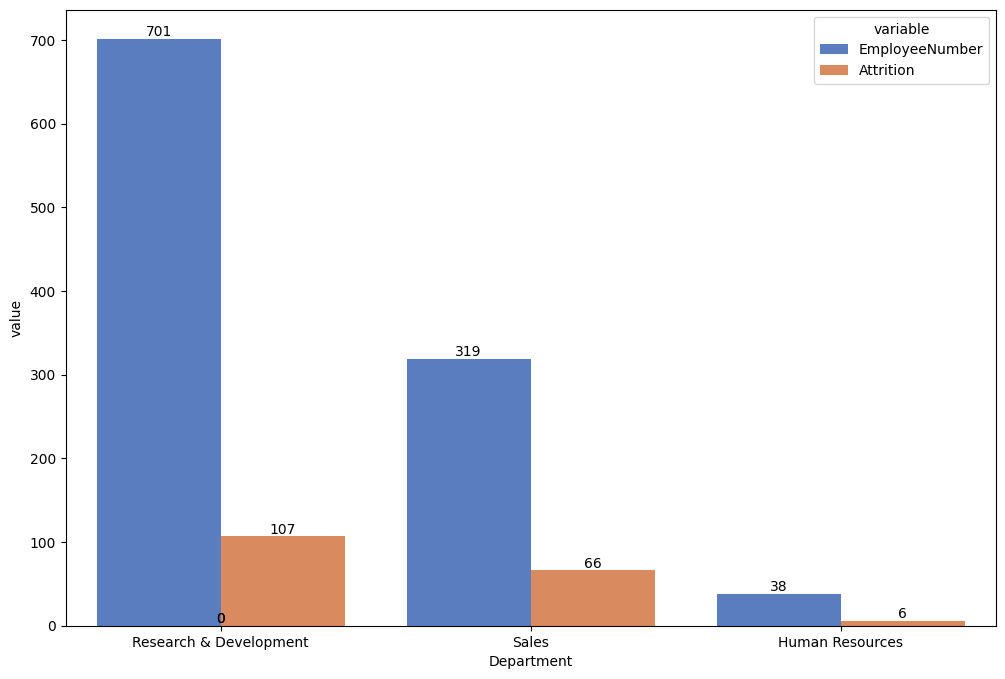

In [6]:
attrition_dep_role('Department')

## Representante de vendas tem a maior rotatividade

,JobRole,EmployeeNumber,ShareEmployees %,Attrition,ShareAttrition %
0,Sales Executive,232,21.93,39,16.81
1,Research Scientist,214,20.23,38,17.76
2,Laboratory Technician,188,17.77,49,26.06
3,Manufacturing Director,107,10.11,7,6.54
4,Healthcare Representative,88,8.32,8,9.09
5,Manager,79,7.47,5,6.33
6,Research Director,62,5.86,2,3.23
7,Sales Representative,58,5.48,25,43.10
8,Human Resources,30,2.84,6,20.00
9,Total,1058,100.01,179,148.92


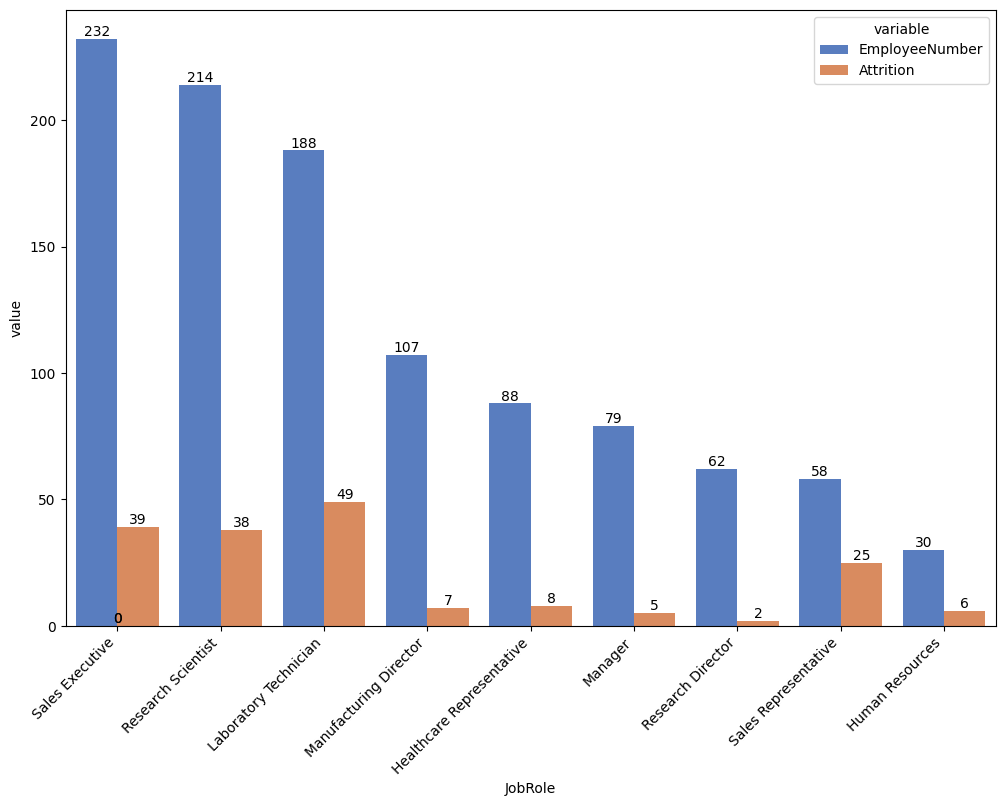

In [7]:
attrition_dep_role('JobRole', rotation=45, anchor='right')

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

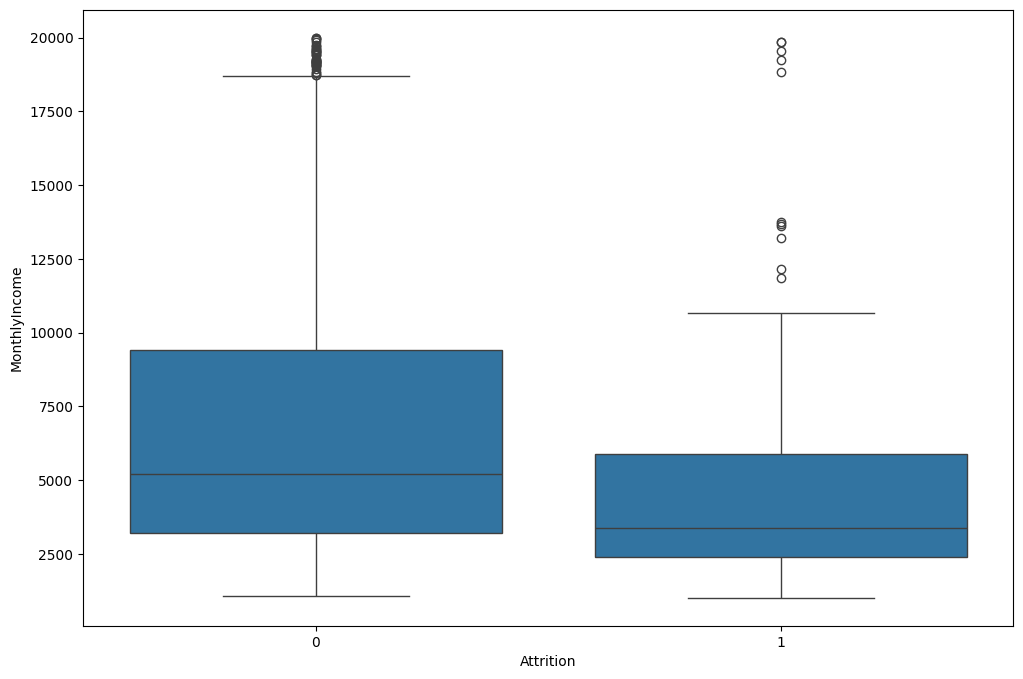

In [8]:
# Boxplot ou Histograma
# Teste estatistico
    
plt.figure(figsize=(12, 8))
display(sns.boxplot(x='Attrition', y='MonthlyIncome', data=df))

Grupo '0' (Ainda na Empresa): O boxplot mostra que a renda mensal mediana para os funcionários que ainda estão na empresa é mais alta do que a dos funcionários desligados. O IQR é relativamente estreito, o que sugere que a maioria dos salários está concentrada em torno da mediana, indicando menos variação nos salários nesse grupo. Há outliers acima do terceiro quartil, indicando que existem alguns funcionários com rendas mensais consideravelmente mais altas do que a média dos que permanecem na empresa.

Grupo '1' (Desligados da Empresa): Para os funcionários que foram desligados, o boxplot indica uma mediana de salário mais baixa, e o IQR é mais largo, sugerindo maior variação nos salários dos desligados. Além disso, há uma quantidade notável de outliers acima do terceiro quartil, o que pode indicar que funcionários com salários mais altos também foram desligados ou que talvez haja fatores compensatórios específicos para esses casos.

A partir deste gráfico, pode-se concluir que, em geral, os funcionários que permanecem na empresa tendem a ter salários mais consistentes e, possivelmente, mais altos em relação à mediana do que aqueles que foram desligados. Entretanto, é importante notar que há exceções, especialmente no grupo de desligados, onde alguns indivíduos tinham salários substancialmente mais altos. Isso pode sugerir que a remuneração pode não ser o único fator influenciando a decisão de deixar a empresa; outros fatores como oportunidades de crescimento, satisfação no trabalho e dinâmica de equipe também podem ser relevantes.

<Figure size 1200x800 with 0 Axes>

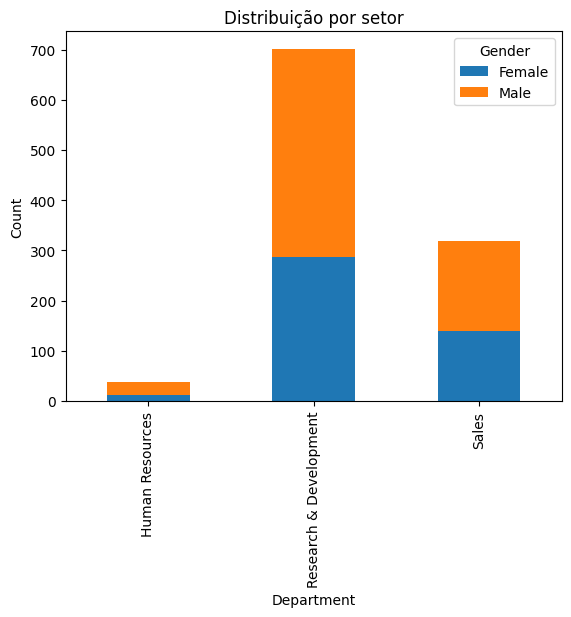

In [20]:
gender_department_counts = df.groupby(['Department', 'Gender']).size().unstack()

# Plotar um gráfico de barras para visualizar a distribuição de homens e mulheres em cada setor
plt.figure(figsize=(12, 8))
gender_department_counts.plot(kind='bar', stacked=True)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribuição por setor')
plt.legend(title='Gender')
plt.show()

Comparativo da média salarial por entre homens e mulheres de acordo com a idade

C:\Users\gusta\AppData\Local\Temp\ipykernel_11872\2499440517.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_mon_inc_age = df.groupby('AgeGroup')['MonthlyIncome'].mean().reset_index()
C:\Users\gusta\AppData\Local\Temp\ipykernel_11872\2499440517.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_mon_inc_years = df.groupby('AgeGroup')['YearsAtCompany'].mean().reset_index()


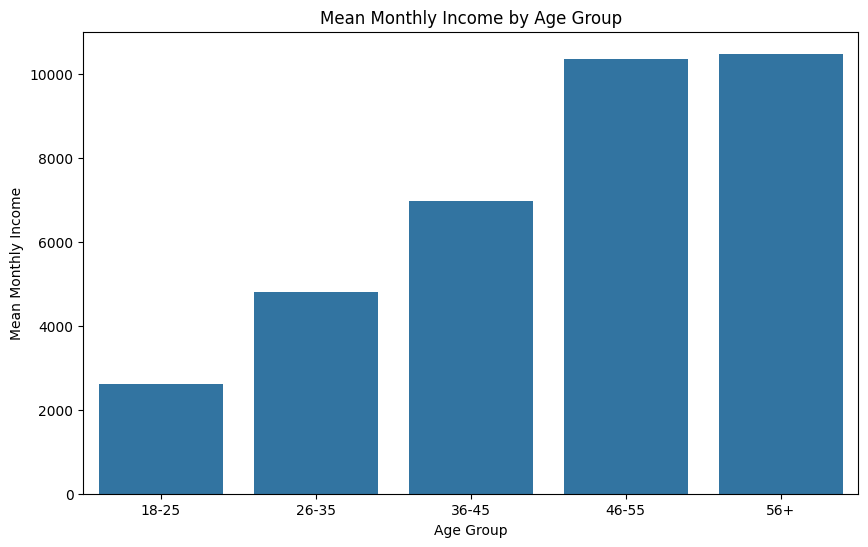

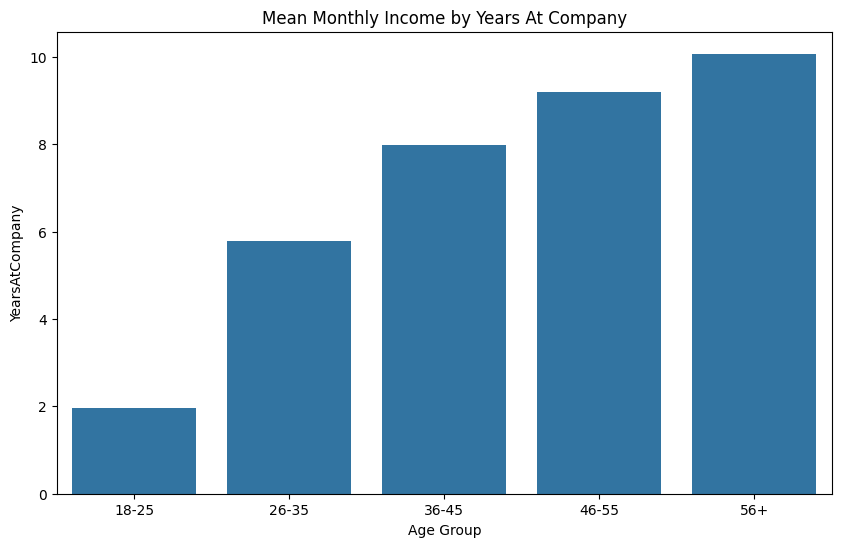

In [10]:
bins = [18, 25, 35, 45, 55, np.inf]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

mean_mon_inc_age = df.groupby('AgeGroup')['MonthlyIncome'].mean().reset_index()
mean_mon_inc_years = df.groupby('AgeGroup')['YearsAtCompany'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='MonthlyIncome', data=mean_mon_inc_age)
plt.title('Mean Monthly Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Monthly Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='YearsAtCompany', data=mean_mon_inc_years)
plt.title('Mean Monthly Income by Years At Company')
plt.xlabel('Age Group')
plt.ylabel('YearsAtCompany')
plt.show()

# Desempenho e Promoção (PerformanceRating, PercentSalaryHike):

Distribuição das avaliações de desempenho e dos percentuais de aumento salarial.
Relação entre desempenho, aumento salarial e satisfação no trabalho.

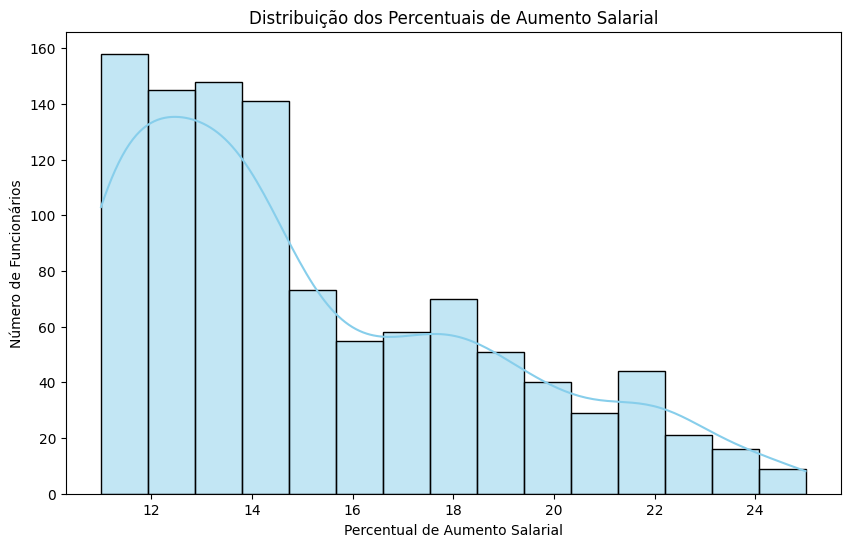

In [11]:
data = df.copy()

plt.figure(figsize=(10, 6))
sns.histplot(data['PercentSalaryHike'], bins=15, kde=True, color='skyblue')
plt.title('Distribuição dos Percentuais de Aumento Salarial')
plt.xlabel('Percentual de Aumento Salarial')
plt.ylabel('Número de Funcionários')
plt.show()

# Média de satisfação em cada área.
Distribuição da satisfação em cada área (histograma, boxplot).
Relação entre diferentes medidas de satisfação (por exemplo, correlação entre JobSatisfaction e RelationshipSatisfaction).
Tempo na Empresa (YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager):

Média de satisfação em cada área:
JobSatisfaction             2.749527
EnvironmentSatisfaction     2.712665
RelationshipSatisfaction    2.726843
WorkLifeBalance             2.763705
dtype: float64


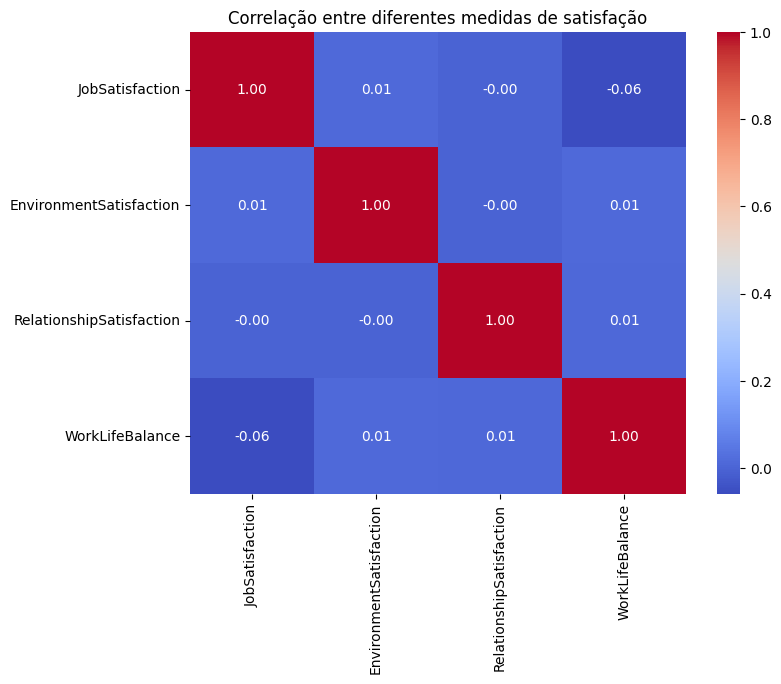

In [12]:
# Média de satisfação em cada área
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
satisfaction_means = data[satisfaction_cols].mean()

print("Média de satisfação em cada área:")
print(satisfaction_means)

# Relação entre diferentes medidas de satisfação
satisfaction_corr = data[satisfaction_cols].corr(method = "kendall")

plt.figure(figsize=(8, 6))
sns.heatmap(satisfaction_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre diferentes medidas de satisfação')
plt.show()

Média de renda mensal dos funcionários: 6625.945179584121


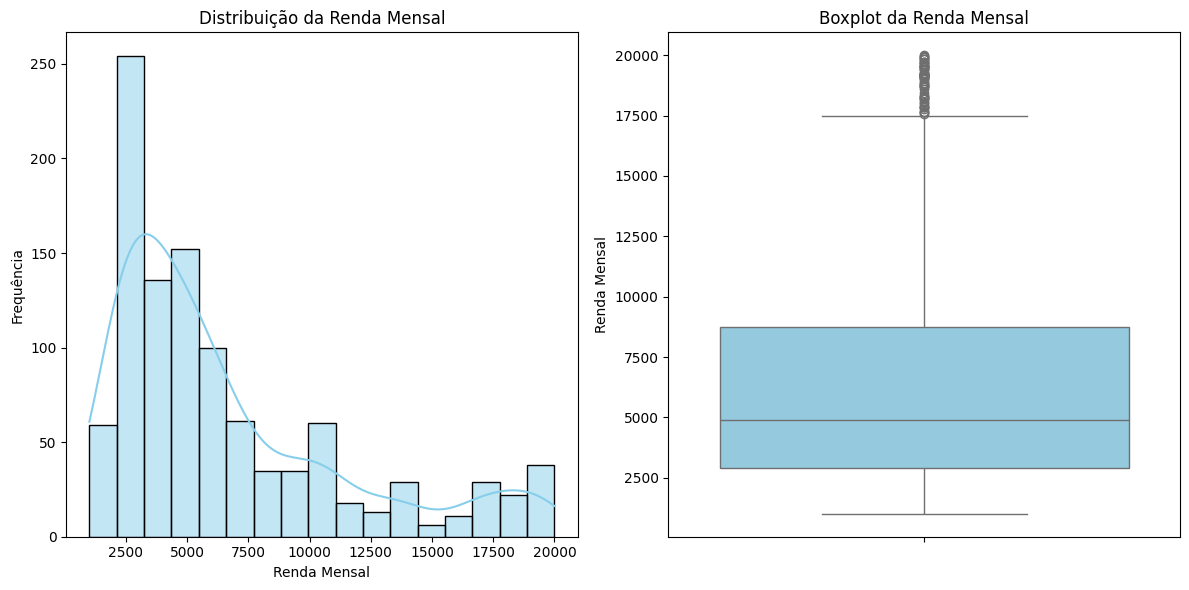

Quartis da renda mensal:
0.25    2900.25
0.50    4903.50
0.75    8736.50
Name: MonthlyIncome, dtype: float64


In [13]:
# Média de renda mensal dos funcionários
mean_monthly_income = data['MonthlyIncome'].mean()
print("Média de renda mensal dos funcionários:", mean_monthly_income)

# Distribuição da renda mensal (histograma, boxplot)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['MonthlyIncome'], kde=True, color='skyblue')
plt.title('Distribuição da Renda Mensal')
plt.xlabel('Renda Mensal')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['MonthlyIncome'], color='skyblue')
plt.title('Boxplot da Renda Mensal')
plt.ylabel('Renda Mensal')

plt.tight_layout()
plt.show()

# Quartis da renda mensal
quartis = data['MonthlyIncome'].quantile([0.25, 0.5, 0.75])
print("Quartis da renda mensal:")
print(quartis)

# Satisfação no Trabalho (JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance)
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

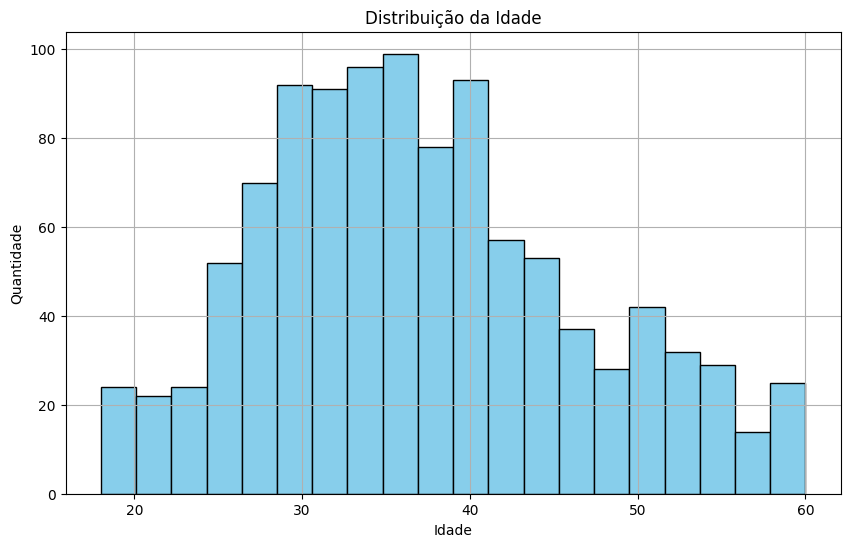

In [14]:
# Distribuição da idade (Age)
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()

Insight: A maioria dos funcionários tem entre 30 a 40 anos.



___________

In [15]:
data['JobSatisfaction']

0       4
1       2
2       3
3       3
4       2
       ..
1053    3
1054    2
1055    1
1056    3
1057    2
Name: JobSatisfaction, Length: 1058, dtype: int64

### Satisfação no Trabalho (JobSatisfaction):

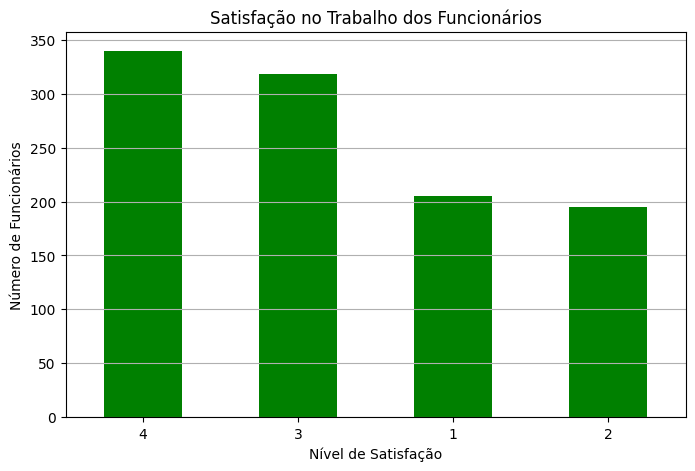

In [16]:
# Legenda

plt.figure(figsize=(8, 5))
data['JobSatisfaction'].value_counts().plot(kind='bar', color='green')
plt.title('Satisfação no Trabalho dos Funcionários')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Número de Funcionários')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Insight: A maioria dos funcionários parece estar moderadamente satisfeita com seu trabalho.

__________

### Relação entre Horas Extras (OverTime) e Atrito (Attrition):

In [17]:
# plt.figure(figsize=(8, 5))
# sns.countplot(data=data, x='OverTime', hue='Attrition', palette='coolwarm')
# plt.title('Relação entre Horas Extras e Atrito')
# plt.xlabel('Horas Extras')
# plt.ylabel('Contagem')
# plt.show()

Insight: Funcionários que fazem horas extras tendem a ter uma taxa de atrito mais alta.

___________________

### Distribuição de Salário Mensal (MonthlyIncome) por Departamento (Department):

Text(0, 0.5, 'Salário Mensal')

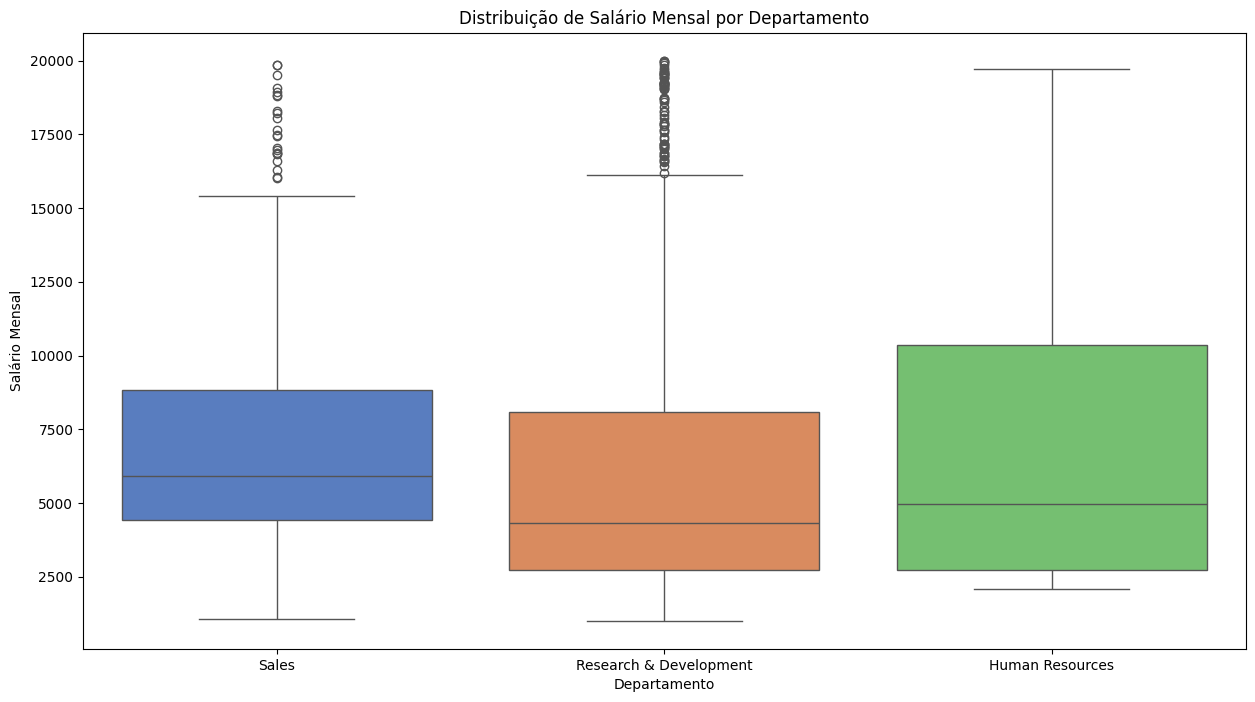

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x='Department', y='MonthlyIncome', hue='Department', palette='muted')
plt.title('Distribuição de Salário Mensal por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário Mensal')

Insight: O departamento de Vendas parece ter uma distribuição de salário mensal mais ampla em comparação com outros departamentos.

__________

### Correlação entre Variáveis:

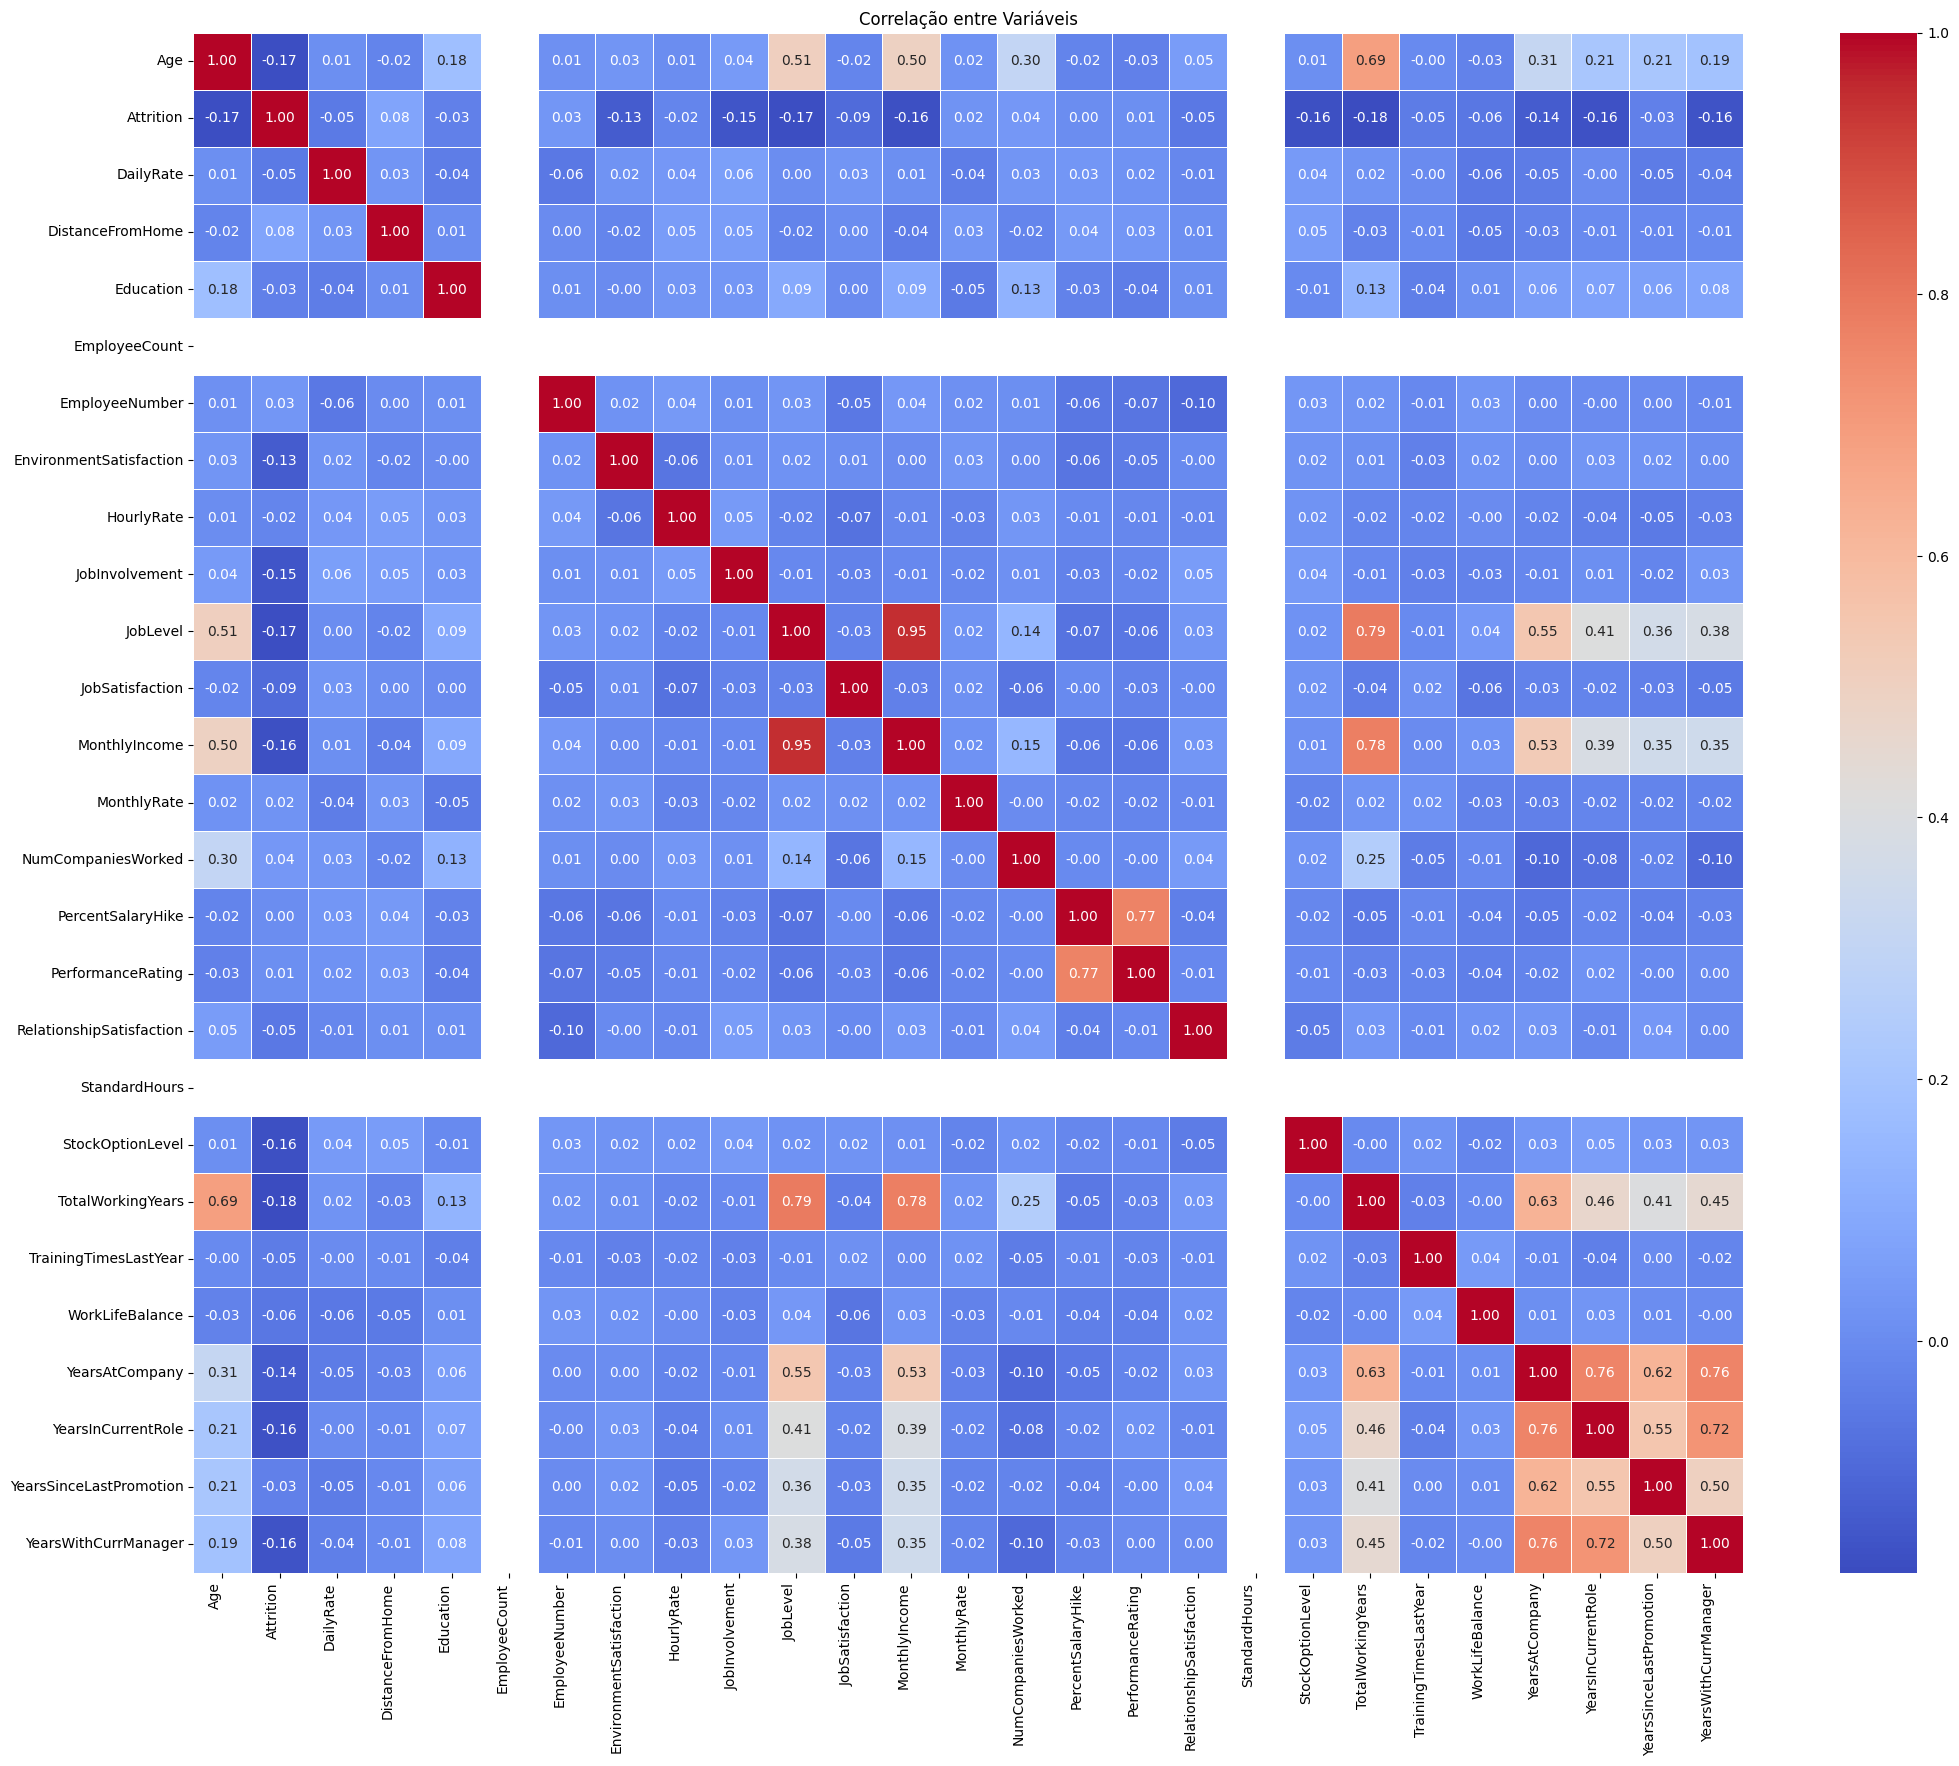

In [19]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(25, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Correlação entre Variáveis')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

Insight: Há uma correlação positiva entre o nível de satisfação no trabalho e o desempenho do funcionário.